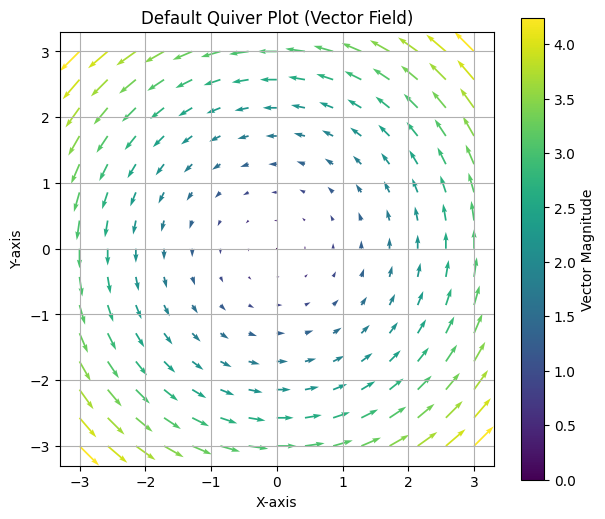

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データの準備
nxgrid = 15
nygrid = 15
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)

# ベクトル成分 (例として渦のような流れ)
Jx = -Y
Jy = X
Jz = np.sqrt(Jx**2 + Jy**2) # 色付けのためのマグニチュード

plt.figure(figsize=(7, 6))
plt.quiver(X, Y, Jx, Jy, Jz, cmap='viridis') # Jzで色付け
plt.colorbar(label='Vector Magnitude')
plt.title('Default Quiver Plot (Vector Field)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # 軸のアスペクト比を等しくする
plt.show()


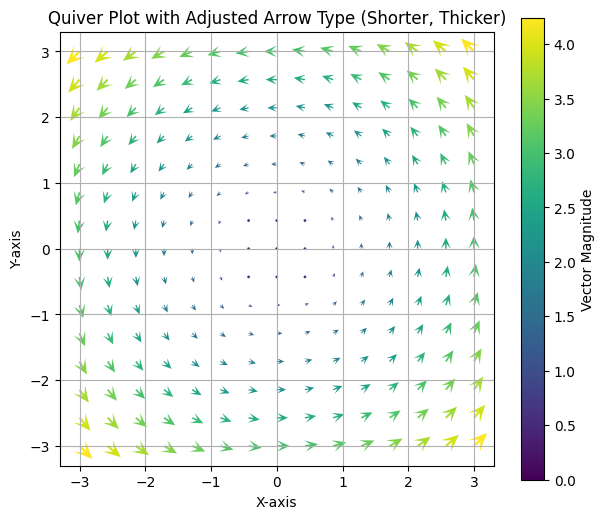

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# データの準備 (上記と同じ)
nxgrid = 15
nygrid = 15
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)
Jx = -Y
Jy = X
Jz = np.sqrt(Jx**2 + Jy**2)

plt.figure(figsize=(7, 6))

# scale=100: 矢印を短くする (デフォルトよりかなり短くなります)
# width=0.007: 矢印のシャフトを少し太くする
# headwidth=7: 矢頭を広くする
# headlength=8: 矢頭を長くする
plt.quiver(X, Y, Jx, Jy, Jz,
           cmap='viridis',
           scale=100,
           width=0.007,
           headwidth=7,
           headlength=8)

plt.colorbar(label='Vector Magnitude')
plt.title('Quiver Plot with Adjusted Arrow Type (Shorter, Thicker)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

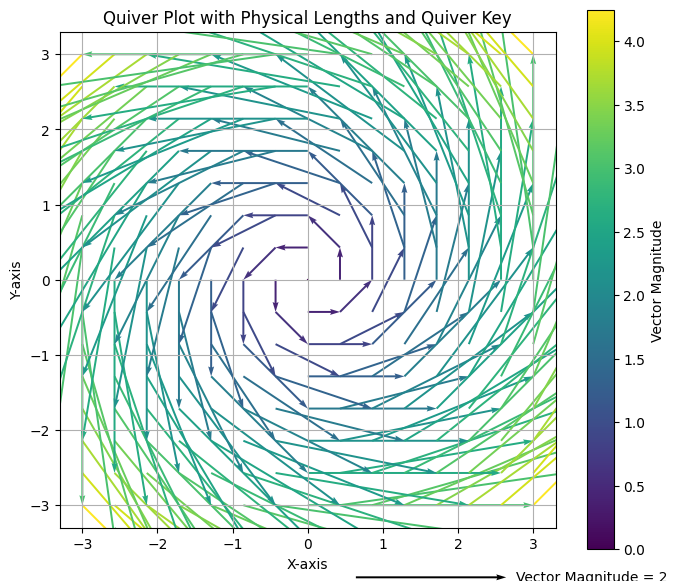

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# データの準備 (上記と同じ)
nxgrid = 15
nygrid = 15
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)
Jx = -Y
Jy = X
# Jx, Jy の最大マグニチュードが約 3 なので、U=2 でキーを作ります
J_magnitude = np.sqrt(Jx**2 + Jy**2)

plt.figure(figsize=(8, 7))

# scale_units='xy' と scale=1 で、矢印の長さをデータ単位に合わせる
# angles='xy' で矢印の角度もデータに合わせる
Q = plt.quiver(X, Y, Jx, Jy, J_magnitude,
               cmap='viridis',
               angles='xy',
               scale_units='xy',
               scale=1) # これで矢印の長さがJ_magnitudeに比例する

plt.colorbar(label='Vector Magnitude')
plt.title('Quiver Plot with Physical Lengths and Quiver Key')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Quiver Key を追加
# Q: quiverオブジェクト
# X, Y: キー矢印の表示位置 (図の正規化座標)
# U: キー矢印が表すベクトル長 (データ単位)
# label: キーのラベル
plt.quiverkey(Q, X=0.9, Y=-0.1, U=2, label='Vector Magnitude = 2',
              labelpos='E', coordinates='axes') # labelpos='E' でラベルを右に配置

plt.show()



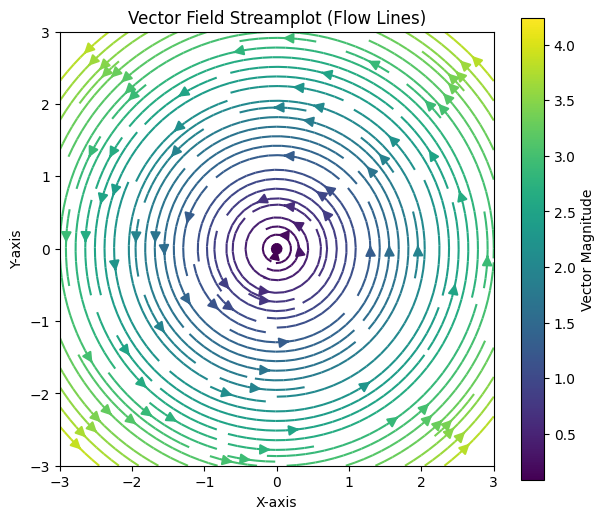

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# データの準備 (plt.quiverと同じデータを使用)
nxgrid = 50 # streamplotはグリッド点を増やした方が滑らかになります
nygrid = 50
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)

# ベクトル成分 (渦のような流れ)
Jx = -Y
Jy = X

# 流線の速度（マグニチュード）を計算 (色付けや線幅に利用)
J_magnitude = np.sqrt(Jx**2 + Jy**2)

plt.figure(figsize=(7, 6))

# 流線（Streamlines）の描画
plt.streamplot(
    X, Y, Jx, Jy,
    color=J_magnitude, # マグニチュードで流線の色を変化させる
    cmap='viridis',    # カラーマップを指定
    linewidth=1.5,     # 流線の幅
    density=1.5,       # 流線の密度（値が大きいほど線が増えます）
    arrowsize=1.5      # 流線上の方向を示す矢印のサイズ
)

plt.colorbar(label='Vector Magnitude')
plt.title('Vector Field Streamplot (Flow Lines)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

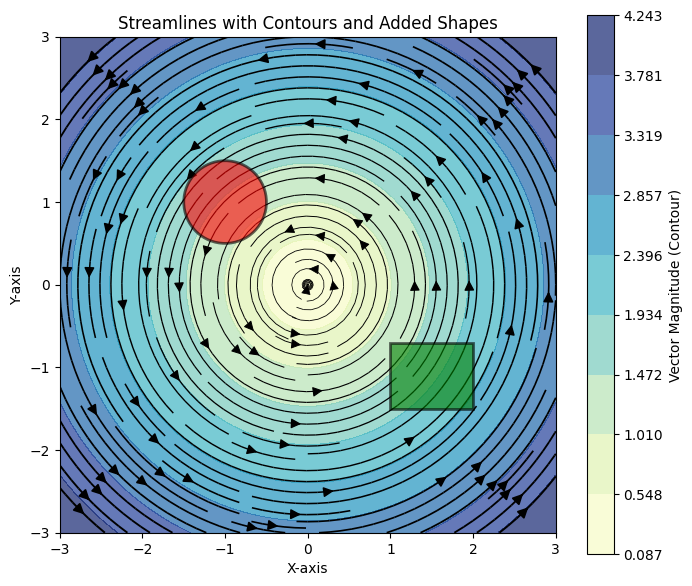

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # patches モジュールをインポート

# データの準備
nxgrid = 50
nygrid = 50
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)

# ベクトル成分 (渦のような流れ)
x = -Y
Jy = X
J_magnitude = np.sqrt(Jx**2 + Jy**2)

# --- 図の作成 ---
plt.figure(figsize=(8, 7))

# 1. コンター（塗りつぶし等高線）を描画
contour_levels = np.linspace(J_magnitude.min(), J_magnitude.max(), 10)
C = plt.contourf(X, Y, J_magnitude, levels=contour_levels, cmap='YlGnBu', alpha=0.7)
plt.colorbar(C, label='Vector Magnitude (Contour)')

# 2. 流線を描画
plt.streamplot(
    X, Y, Jx, Jy,
    color='k',
    linewidth=1.0 * J_magnitude / J_magnitude.max() + 0.5,
    density=1.5,
    arrowsize=1.5,
    zorder=2
)

# --- 3. 図形を追加 ---

# 円を追加する例
circle_center = (-1, 1) # 円の中心座標
circle_radius = 0.5     # 円の半径
circle = patches.Circle(circle_center, circle_radius,
                        facecolor='red', edgecolor='black', linewidth=2, alpha=0.6, zorder=3)
plt.gca().add_patch(circle) # 現在のAxesに図形を追加

# 長方形を追加する例
rect_bottom_left = (1, -1.5) # 長方形の左下の座標
rect_width = 1.0             # 幅
rect_height = 0.8            # 高さ
rectangle = patches.Rectangle(rect_bottom_left, rect_width, rect_height,
                              facecolor='green', edgecolor='black', linewidth=2, alpha=0.6, zorder=3)
plt.gca().add_patch(rectangle) # 現在のAxesに図形を追加


plt.title('Streamlines with Contours and Added Shapes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(X.min(), X.max()) # 軸の範囲をデータに合わせる (図形がはみ出さないように)
plt.ylim(Y.min(), Y.max())
plt.show()



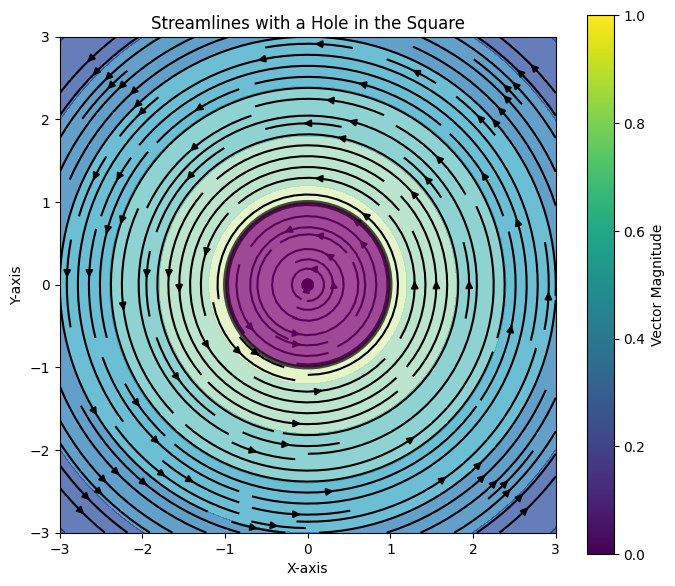

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches

# --- 1. グリッドとベクトル場の準備 (可視化のために再利用) ---
nxgrid = 50
nygrid = 50
x_grid = np.linspace(-3, 3, nxgrid)
y_grid = np.linspace(-3, 3, nygrid)
X, Y = np.meshgrid(x_grid, y_grid)
Jx = -Y
Jy = X
J_magnitude = np.sqrt(Jx**2 + Jy**2)

plt.figure(figsize=(8, 7))

# 背景として流線とコンターを描画 (前回のコードから再掲)
plt.contourf(X, Y, J_magnitude, cmap='YlGnBu', alpha=0.7)
plt.streamplot(X, Y, Jx, Jy, color='k', density=1.5, zorder=2)
plt.colorbar(label='Vector Magnitude')

# --- 2. 穴あき図形 (PathPatch) の作成 ---

# A. 外側の図形 (ここでは大きな四角形) のパスを定義
# 頂点座標 (矩形の四隅)
exterior_verts = [
    (-2.5, -2.5),  # 左下
    (-2.5, 2.5),   # 左上
    (2.5, 2.5),    # 右上
    (2.5, -2.5),   # 右下
    (0., 0.)       # 閉じるためのダミー (後で破棄される)
]
# 各頂点に対応するコマンド (MOVE to, LINE to, CLOSEPOLY)
exterior_codes = [mpath.Path.MOVETO,
                  mpath.Path.LINETO,
                  mpath.Path.LINETO,
                  mpath.Path.LINETO,
                  mpath.Path.CLOSEPOLY] # CLOSEPOLYで最初の点に戻って閉じる

# B. 穴となる内側の図形 (ここでは小さな円) のパスを定義
# 円の中心 (0, 0)
hole_center = (0, 0)
hole_radius = 1.0

# CircleはPathで直接作れないため、Pathのクラスメソッドを使って円の頂点を生成
# `mpath.Path.circle()`は円のパスを作成します。
hole_path = mpath.Path.circle(hole_center, hole_radius)

# C. 外側のパスと内側の穴のパスを結合して一つのPathオブジェクトにする
# 穴をあけるために、外側のパスの後に、穴のパスを**逆順（反時計回り）**で追加します。
path_with_hole = mpath.Path(exterior_verts, exterior_codes).make_compound_path(hole_path)

# D. PathPatchを作成し、Axesに追加
patch = patches.PathPatch(path_with_hole,
                          facecolor='purple',
                          edgecolor='black',
                          lw=3,
                          alpha=0.7,
                          zorder=4) # 他の要素より手前に

plt.gca().add_patch(patch)

# --- 3. プロットの仕上げ ---
plt.title('Streamlines with a Hole in the Square')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.show()